In [11]:
#Example F(t) = sin(t) + noise(t)
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

Using TensorFlow backend.


In [12]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

In [13]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [14]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [8]:
time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)
print(X_train.shape, y_train.shape)

(790, 10, 1) (790,)


In [15]:
model = Sequential()
model.add(LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [16]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 711 samples, validate on 79 samples
Epoch 1/30
711/711 [==============================] - 1s 1ms/step - loss: 0.4231 - val_loss: 0.3698
Epoch 2/30
711/711 [==============================] - 1s 1ms/step - loss: 0.3303 - val_loss: 0.3287
Epoch 3/30
711/711 [==============================] - 1s 764us/step - loss: 0.3206 - val_loss: 0.3233
Epoch 4/30
711/711 [==============================] - 0s 394us/step - loss: 0.3189 - val_loss: 0.3201
Epoch 5/30
711/711 [==============================] - 0s 388us/step - loss: 0.3176 - val_loss: 0.3179
Epoch 6/30
711/711 [==============================] - 0s 422us/step - loss: 0.3167 - val_loss: 0.3161
Epoch 7/30
711/711 [==============================] - 0s 437us/step - loss: 0.3159 - val_loss: 0.3146
Epoch 8/30
711/711 [==============================] - 0s 412us/step - loss: 0.3152 - val_loss: 0.3133
Epoch 9/30
711/711 [==============================] - 0s 383us/step - loss: 0.3146 - val_loss: 0.3121
Epoch 10/30
711/711 [====================

In [17]:
y_pred = model.predict(X_test)

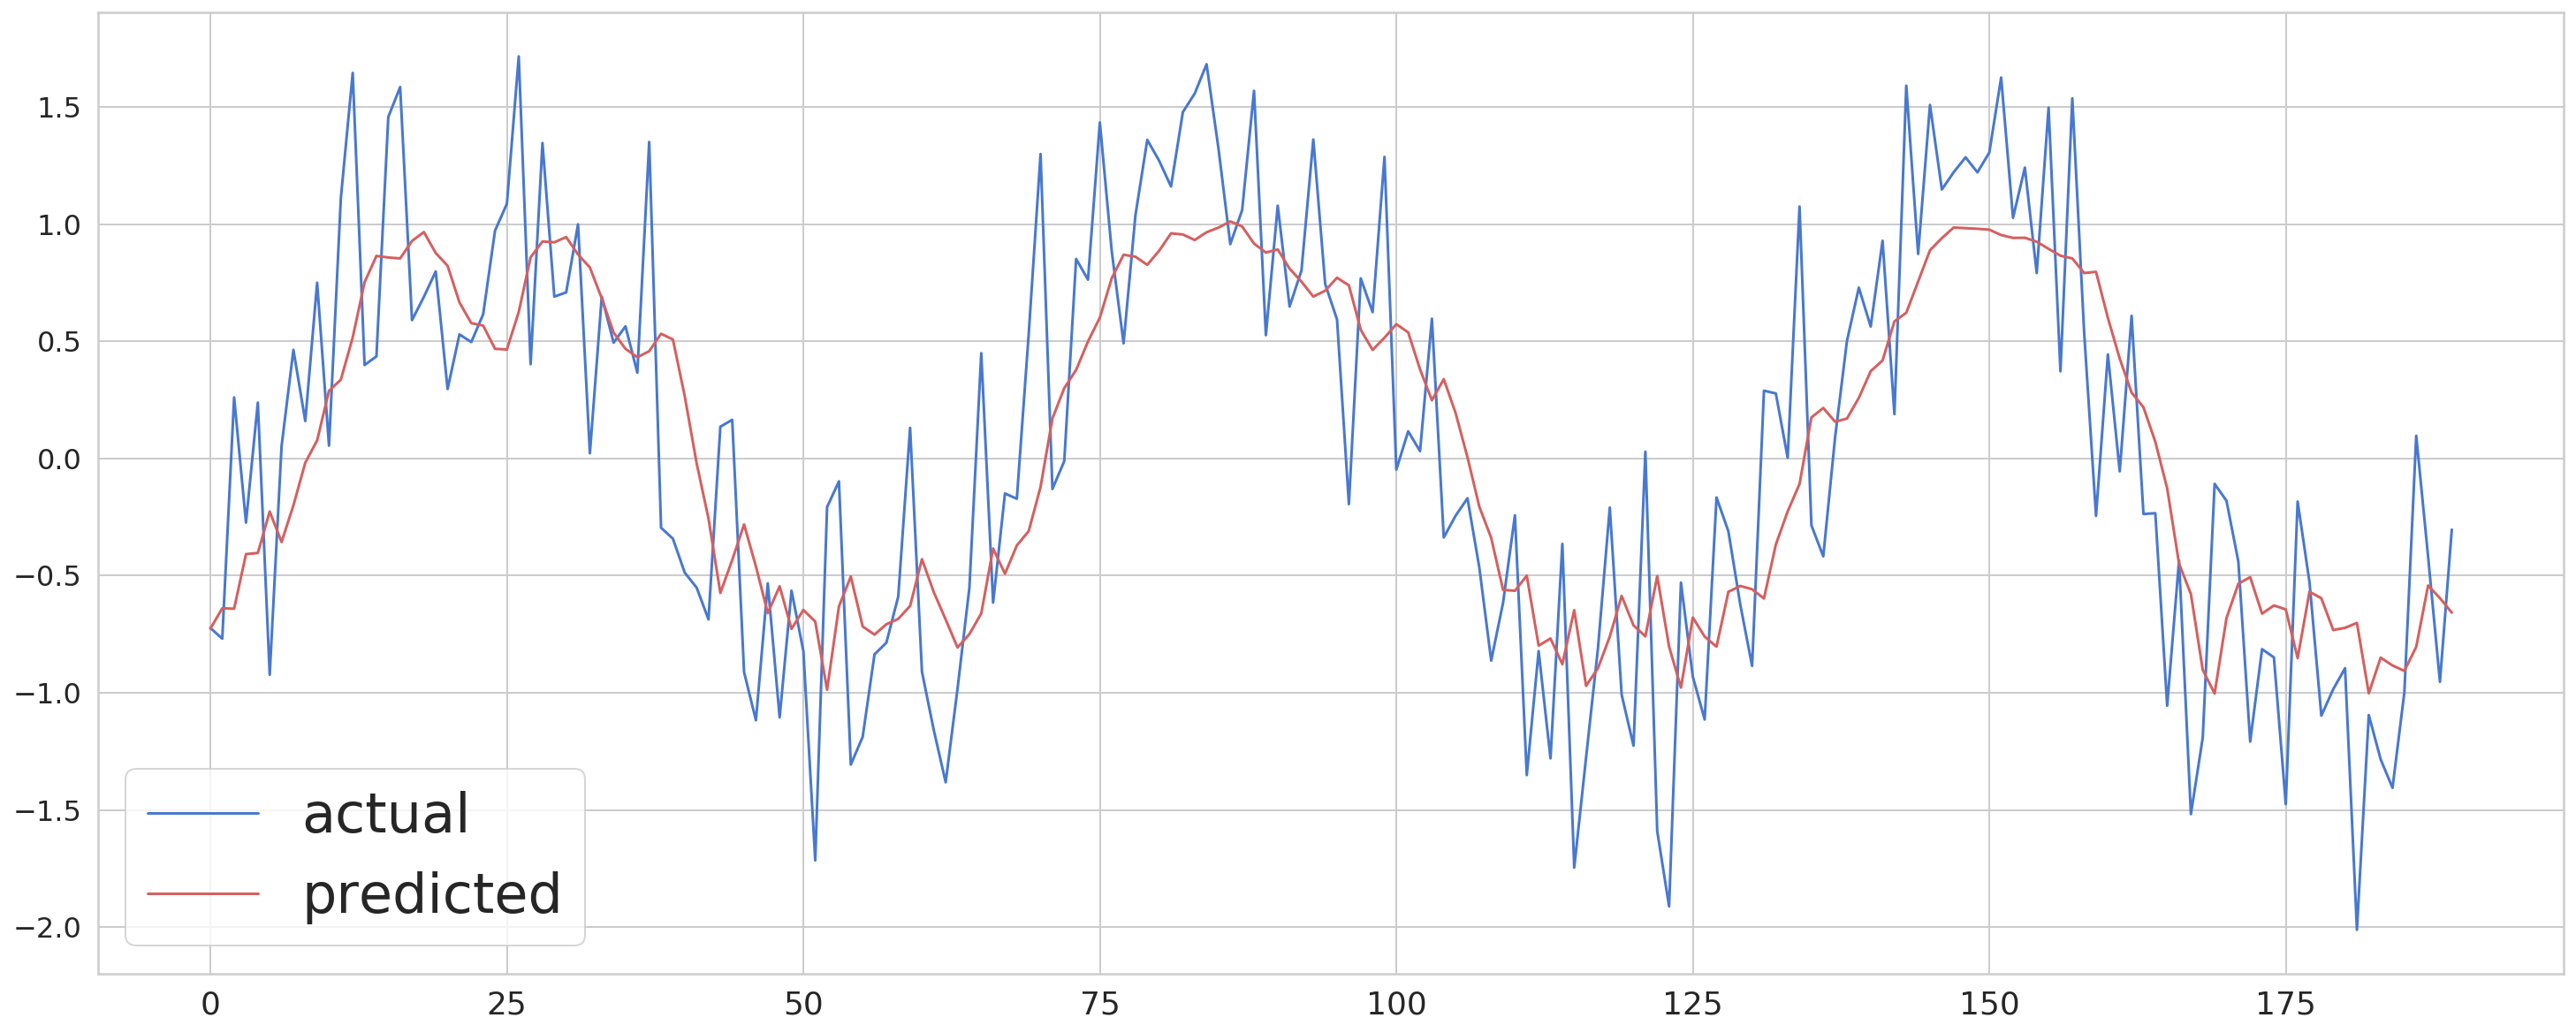

In [22]:
plt.figure(figsize=(25, 10))
plt.plot(y_test, label="actual")
plt.plot(y_pred, color='r',label="predicted")
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()